In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

[['', '0.15236', '0.04708', '-0.0000595'], ['0.35', '-0.15590', '0.04818', '0.0000656'], ['0.10', '-0.41024', '0.33189', '-0.0000635'], ['0.00', '-0.51151', '0.51151', '0.0000572'], ['0.10', '-0.41779', '0.33800', '-0.0000438']]
(2000, 4)


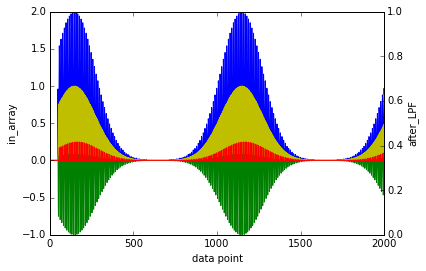

In [5]:
teensy = serial.Serial('/dev/ttyACM0', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0], 'b' ,label='in_array')
ax2 = ax.twinx()
ax.plot(range(n_values), values4[:,1], 'g')
ax.plot(range(n_values), values4[:,2], 'y')
ax.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');